# GB

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv(r'C:\Users\rodri\GitHub\My_Projects\1 Aulas Data Science\4 - Machine Learning\Regressao Linear/autompg-dataset.zip')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [10]:
df = df[df.horsepower != '?']
df.drop('car name', axis=1, inplace=True)

In [11]:
from sklearn.model_selection import train_test_split
X = df.drop(['mpg'], axis=1)
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
# Import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

# Instantiate gb
gb = GradientBoostingRegressor(learning_rate=0.01,
                               n_estimators=500,
                               random_state=42)

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
                                 subsample=0.9,
                                 max_features=0.75,
                                 learning_rate=0.01,
                                 n_estimators=500,                                
                                 random_state=42)
                           
# Fit gb to the training set            
gb.fit(X_train, y_train)                           

sgbr.fit(X_train, y_train) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=0.75,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=0.9, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [73]:
y_pred = gb.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2.0426434754656424
MSE: 8.117932020189775
RMSE: 2.849198487327581


In [74]:
y_pred = sgbr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.9253926848806042
MSE: 7.730729065031821
RMSE: 2.7804188650330763


In [75]:
sgbr.feature_importances_

array([0.12856785, 0.41032789, 0.14067671, 0.18340428, 0.02416679,
       0.10971832, 0.00313816])

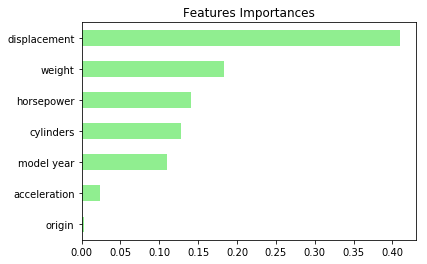

In [76]:
# Create a pd.Series of features importances
importances = pd.Series(data=sgbr.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [77]:
df = pd.read_csv(r'C:\Users\rodri\GitHub\My_Projects\1 Aulas Data Science\Data Sets/breast-cancer-wisconsin-data.zip')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [78]:
d={'M':1,'B':0}
df['diagnosis'] = df['diagnosis'].map(d)
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split
features = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
targets = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.30, stratify=targets,random_state=1)

In [96]:
# Instantiate gb
gb = GradientBoostingClassifier(learning_rate=0.01,
                               n_estimators=350,
                               random_state=42)
                           
# Instantiate sgbr
sgbr = GradientBoostingClassifier(subsample=0.8,
                                 max_features=0.70,
                                 learning_rate=0.001,
                                 n_estimators=750,                                
                                 random_state=42)
                           
# Fit gb to the training set            
gb.fit(X_train, y_train)                           

sgbr.fit(X_train, y_train) 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='deviance', max_depth=3,
              max_features=0.7, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=750,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [97]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = gb.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f} %".format(acc*100))

Test set accuracy: 93.57 %


In [98]:
# Predict test set labels
y_pred = sgbr.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f} %".format(acc*100))

Test set accuracy: 93.57 %


In [99]:
y_pred_proba = gb.predict_proba(X_test)
y_pred_proba

array([[0.98545915, 0.01454085],
       [0.02419141, 0.97580859],
       [0.02089288, 0.97910712],
       [0.98545915, 0.01454085],
       [0.98545915, 0.01454085],
       [0.98545915, 0.01454085],
       [0.05546918, 0.94453082],
       [0.98545915, 0.01454085],
       [0.98189117, 0.01810883],
       [0.97345879, 0.02654121],
       [0.89403814, 0.10596186],
       [0.98545915, 0.01454085],
       [0.21340793, 0.78659207],
       [0.94123684, 0.05876316],
       [0.98537053, 0.01462947],
       [0.02089288, 0.97910712],
       [0.97321146, 0.02678854],
       [0.8783289 , 0.1216711 ],
       [0.9770725 , 0.0229275 ],
       [0.98356125, 0.01643875],
       [0.02089288, 0.97910712],
       [0.97459929, 0.02540071],
       [0.90256398, 0.09743602],
       [0.02089288, 0.97910712],
       [0.98545915, 0.01454085],
       [0.98356125, 0.01643875],
       [0.98356125, 0.01643875],
       [0.02089288, 0.97910712],
       [0.98043816, 0.01956184],
       [0.02173879, 0.97826121],
       [0.

In [100]:
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)